## Neural Network Language Modeling 의 소개
지난 시간에 word 를 나타내는 방법들에 대해 알아보았습니다. 그중에 word embedding의 경우 해당 단어를 가장 잘 나타내는 vector 를 구하기 위해서는 **'학습'** 이라는 과정을 거친다고 언급했습니다. 이번 Tutorial 에서는
1. **NNLM(뉴럴 네트워크 언어 모델**) 이 무엇인가
2. **뉴럴 네트워크와 학습**의 의미 복습
3. **NNLM** 실습

을 해보도록 하겠습니다.

## 1. NNLM (뉴럴 네트워크 언어 모델) 이란?
*언어라는 현상을 수학적으로 나타내기 위해 단어의 시퀀스에 확률을 할당하는 모델을 말한다.*

너무 어려운 설명이죠. 풀어서 설명을 하겠습니다. <br>

-----------------------------
### 직관적 해석
예를 들어 다음과 같은 단어의 시퀀스가 주어졌다고 해봅시다.

**"나는 버스에"**

그 뒤에 어떤 단어가 와야 가장 적합할까요?

1. **탔다**
2. 갔다
3. 먹었다

한국인이 보기에는 당연히 **1번 탔다**가 적합하겠죠? 이것을 **수학적**으로 해석을 하는 것이 **언어 모델링**입니다 <br>

### 수학적 해석
어떤 함수 **f(x)** 가 있다고 해봅시다. f(x)의 input **x**는 이전 단어들의 집합 "나는 버스에" 입니다. f(x)의 output은 각각 '탔다', '갔다', '먹었다' 의 확률이라고 가정해봅시다.

다음과 같은 함수의 경우, '탔다'의 확률이 가장 높게 확률 분포가 나오는 함수가 가장 좋은 **수학적 모델** 이라고 할 수 있습니다.<br>
(모든 것은 조건부 확률로 수학적 표기가 가능합니다. 나중에 논문을 읽거나 쓸 때 필수적이니 **확통**을 공부합시다!!)

## 2. 뉴럴 네트워크와 학습의 의미
### 뉴럴 네트워크?
여러분들이 중학교때 배운 다항함수와 같습니다. 단 값들의 연산을 그래프 구조로 그려보았을때 뇌의 뉴런들의 연결과 비슷하다고 하여 이름이 "뉴럴 네트워크"가 된겁니다.

### 학습이란?
**이 그림만 기억하세요**


<img src="https://miro.medium.com/max/541/1*xxxqZtZExBJoxmYKIY-waw.png" width=300/>
<img src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." width=300/>

우리들의 다항함수 (뉴럴 네트워크)가 빨간선이라고 해봅시다. 우리들의 빨간선은 파란색의 점들의 분포와 가장 유사하게 그리고 싶습니다.

여러분도 아시다시피 함수는 **계수**들과 **상수항**에 의하여 변하죠. **계수**에 따른 **오차의 합**을 그린게 두번째 그림 입니다.<br>
**즉**, 가장 좋은 **계수**값은 **오차**가 **가장 작은** 가운데 지점 입니다.

**Q: 어떻게 가운데 지점을 찾나요?**<br>
그림에서 보시는 바와 같이, **오차가 작아지는 방향**으로 매우 많이 **계수를 변화**시킵니다. 이게 바로 **학습** 입니다<br>
오차가 더이상 크게 줄지 않을 때 **'학습이 끝났다'** 라고 합니다

## 3. NNLM 실습!
지겨운 이론은 끝!! <br>
**구글**에서 검색할 때 **그다음 단어를 예측**해주는걸 본적 있으신가요? 바로 그걸 여러분들이 간단하게 만들어 볼겁니다. 고고~

<img src="https://storage.googleapis.com/gweb-uniblog-publish-prod/original_images/sf_autocomplete_search.jpg" width=500/>

In [24]:
# 수업자료 깃허브 Repository를 다운받아준다
!rm -rf ./NLP_2020
!git clone https://github.com/HanyangTechAI/NLP_2020.git
!rm -rf ./NLP_2020/.git

Cloning into 'NLP_2020'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 80 (delta 41), reused 55 (delta 19), pack-reused 0
Unpacking objects: 100% (80/80), done.


In [25]:
# 필요한 패키지 (인생을 편하게 해주는 미리 만들어놓은 프로그램이라고 보면 된다) 를 설치시킨다
!cat ./NLP_2020/lab01_all_about_sequence/requirements.txt
!echo '----------------------------------'
!pip install -r ./NLP_2020/lab01_all_about_sequence/requirements.txt

yfinance
numpy
pandas
matplotlib
torch
torchvision
----------------------------------


### 데이터셋 구성하기
- 간단한 모델을 만들기 위해 문장 당 단어의 길이는 3 으로 제한한다.
- 전처리의 편리성을 위해 특수부호는 제외한다

In [26]:
sentences = [
    "철수는 고양이를 좋아한다",
    "영희는 고양이를 싫어한다",
    "철수는 밥을 먹고싶다",
    "영희는 밥을 안먹고싶다",
    "철수는 뒷풀이에 가고싶다",
    "영희는 뒷풀이에 안가고싶다",
    "철수는 코딩을하면 불행하다",
    "영희는 코딩을하면 행복하다"
]  # 띄어쓰기가 잘못됐지만 3개의 단어로 문장을 나타내기 위함이다

In [27]:
# 다음 sentence 들 안에있는 단어들을 다 모아서 dictionary를 만들자
def gen_dict(word_dict, index_dict, sentences):
    global_index = 0
    for sentence in sentences:
        for word in sentence.split(' '):
            if word not in word_dict:
                word_dict[word] = global_index
                index_dict[global_index] = word
                global_index += 1

word_dict = {}
index_dict = {}
gen_dict(word_dict, index_dict, sentences)

print('size of word dictionary: {}'.format(len(word_dict)))
print('')
print(word_dict)

size of word dictionary: 14

{'철수는': 0, '고양이를': 1, '좋아한다': 2, '영희는': 3, '싫어한다': 4, '밥을': 5, '먹고싶다': 6, '안먹고싶다': 7, '뒷풀이에': 8, '가고싶다': 9, '안가고싶다': 10, '코딩을하면': 11, '불행하다': 12, '행복하다': 13}


In [28]:
# word dictionary 와 sentences 를 이용해 학습을 위한
# input 과 target 을 반환하는
# dataset 을 만들어준다

import torch
import torch.utils.data as data

class NNLM_Dataset(data.Dataset):
    def __init__(self, sentences, word_dict, word_length):
        self.sentences = sentences
        self.word_dict = word_dict
        self.word_length = word_length
    
    def __len__(self):
        return len(self.sentences)
    
    def __getitem__(self, index):
        sentence = self.sentences[index]
        sentence = sentence.split(' ')
        
        input_list = sentence[0:word_length-1]  # ex) ['철수는', '고양이를']
        target_word = sentence[-1] # ex) '좋아한다'
        
        input_list = list(map(lambda word: self.word_dict[word], input_list))  # ex) [0, 1]
        target_word = self.word_dict[target_word]  # ex) 2
        
        input_tensor = torch.LongTensor(input_list)
        target_tensor = torch.LongTensor([target_word])
        
        return input_tensor, target_tensor

word_length = 3
dataset = NNLM_Dataset(sentences, word_dict, word_length)

In [29]:
# dataset 이 어떻게 작동하는지 봅시다.
# 0 - 7 이외의 숫자를 입력하면 중단되는 loop 입니다
while True:
    index = int(input("숫자를 입력하시오: "))
    if index >= 0 and index < len(dataset):
        print('{}'.format(dataset[index]))
    else:
        print('break loop')
        break

숫자를 입력하시오: 0
(tensor([0, 1]), tensor([2]))
숫자를 입력하시오: 10
break loop


In [30]:
# GPU 효율성을 높여주기 위해 dataloader를 만들어 줍니다.
dataloader = data.DataLoader(dataset, batch_size=len(dataset))

# 다음과 같이 학습 과정에서 dataloader를 쓸 수 있습니다
# batch_size 를 지정해 dataset이 반환하는 행렬이 쌓이는것(concatenated) 을 볼 수 있습니다.
# 예) shape (2,) 짜리 데이터를 batch_size 3 인 경우, shape (3, 2) 가 됩니다.
# 현재 데이터셋은 매우 작은 관계로 batch_size 는 데이터셋 전체크기 입니다
# 
# 왜 batch 라는 개념이 있는지에 대한 설명의 나중에
for datum in dataloader:
    print('shape of input: {}'.format(datum[0].shape))
    print('shape of target: {}'.format(datum[1].shape))
    print('')
    print(datum)

shape of input: torch.Size([8, 2])
shape of target: torch.Size([8, 1])

[tensor([[ 0,  1],
        [ 3,  1],
        [ 0,  5],
        [ 3,  5],
        [ 0,  8],
        [ 3,  8],
        [ 0, 11],
        [ 3, 11]]), tensor([[ 2],
        [ 4],
        [ 6],
        [ 7],
        [ 9],
        [10],
        [12],
        [13]])]


### 간단한 NNLM 모델 만들기

In [31]:
import torch.nn as nn

class NNLM(nn.Module):
    def __init__(self, embedding_dim, n_classes):
        super(NNLM, self).__init__()
        self.embedding_dim = embedding_dim
        self.n_classes = n_classes
        
        self.embedding = nn.Embedding(num_embeddings=self.n_classes,
                                     embedding_dim=self.embedding_dim)
        self.fc1 = nn.Linear(2* self.embedding_dim, 100)
        self.fc2 = nn.Linear(100, n_classes)
        
        self.net = nn.Sequential(
            self.fc1,
            nn.Tanh(),
            self.fc2
        )
    
    def forward(self, x):  # x [batch, 2]
        x = self.embedding(x)  # [batch, 2, emb_dim]
        x = x.view(-1, 2 * self.embedding_dim)  # [batch, 2 * emb_dim]
        y = self.net(x)
        return y

In [32]:
# Test Model
embedding_dim = 1000
n_classes = len(word_dict)
model = NNLM(embedding_dim=embedding_dim,
            n_classes=n_classes).to('cuda')

for input_tensor, _ in dataloader:
    input_tensor = input_tensor.to('cuda')
    output_tensor = model(input_tensor)
    
    print('input_tensor shape: {}'.format(input_tensor.shape))
    print('output_tensor shape: {}'.format(output_tensor.shape))

input_tensor shape: torch.Size([8, 2])
output_tensor shape: torch.Size([8, 14])


### 모델 학습 시키기

In [33]:
# 오차 함수로는 CrossEntropyLoss 를 사용한다
criterion = nn.CrossEntropyLoss()

# optimizer 는 Adam 을 사용한다
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
total_epoch = 10000
loss_list = []

for epoch in range(total_epoch):
    for input_tensor, target_tensor in dataloader:
        input_tensor = input_tensor.to('cuda')
        target_tensor = target_tensor.to('cuda') # [batch_size, 1]
        target_tensor = target_tensor.view(-1) # [batch_size]
        
        optimizer.zero_grad()
        
        output_tensor = model(input_tensor)
        
        # output_tensor: [batch_size, num_classes], target_tensor: [batch_size]
        loss = criterion(output_tensor, target_tensor)
        
        # back propagate
        loss.backward()
        optimizer.step()
        
        if epoch % 1000 == 0:
            print('epoch[{}/{}] loss: {}'.format(epoch, total_epoch, loss))
            loss_list.append(loss.cpu().detach().numpy())

epoch[0/10000] loss: 2.7083580493927
epoch[1000/10000] loss: 0.0003719329833984375
epoch[2000/10000] loss: 0.0001125335693359375
epoch[3000/10000] loss: 4.9948692321777344e-05
epoch[4000/10000] loss: 2.586841583251953e-05
epoch[5000/10000] loss: 1.430511474609375e-05
epoch[6000/10000] loss: 8.225440979003906e-06
epoch[7000/10000] loss: 4.76837158203125e-06
epoch[8000/10000] loss: 2.86102294921875e-06
epoch[9000/10000] loss: 1.7881393432617188e-06


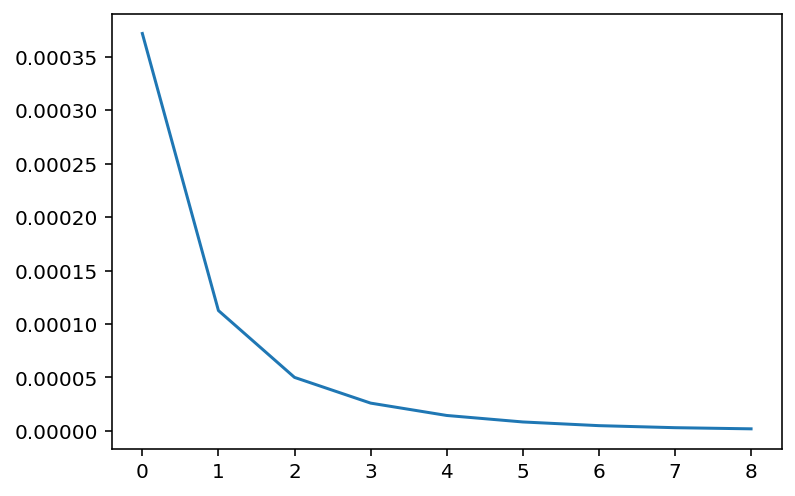

In [35]:
# 반복함에 따라 Loss 가 어떻게 떨어지는지 그래프로 확인해보자
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# 한글 폰트 설정
import matplotlib.font_manager as fm
fontpath = './NLP_2020/NanumMyeongjo.ttf'
font_prop = fm.FontProperties(fname=fontpath, size=10)

plt.plot(loss_list[1:]) # 처음 값은 너무 커서 제외하고 봅시다
plt.show()

### 잘 학습 했으니, 토이 프로그램을 만들어 봅시다

In [ ]:
import numpy as np

def predict(model, word_dict, input_sentence):
    input_ = input_sentence.split(' ')
    input_ = list(map(lambda word: word_dict[word], input_))
    input_ = torch.LongTensor(input_).unsqueeze(0).to('cuda')
    
    output_ = model(input_)
    output_ = output_.squeeze(0).to('cpu').detach().numpy()
    
    return output_
    
    
# 아무것도 입력하지 않으면 루프가 종료됩니다
while True:
    input_sentence = input('2개의 단어를 입력하시오: ')
    if input_sentence == '':
        print('break loop')
        break
    else:
        output_ = predict(model, word_dict, input_sentence)
        arg = output_.argsort()[::-1]
        word_sorted = list(map(lambda index: index_dict[index], arg))
        
        print('ouput tensor: \n{}\n'.format(output_))
        
        ypos = np.arange(len(word_dict))
        word_list = [index_dict[index] for index in range(len(index_dict))]
        plt.bar(ypos, output_)
        plt.xticks(ypos, word_list, rotation=70, fontproperties=font_prop)
        plt.show()
        
        print('sorted argmax: \n{}\n'.format(arg))
        print('word likely from left: \n{}\n'.format(word_sorted))
        print('result: {}'.format(word_sorted[0]))